<a href="https://colab.research.google.com/github/frh02/CAN_Research/blob/main/model_comp_CAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size())]

    if group_names and len(group_names)==cf.size():
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('Social_Network_Ads.csv')
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = np.loadtxt('/content/X_train3.txt', delimiter=",")
y_train = np.loadtxt('/content/y_train3.txt')
X_test = np.loadtxt('/content/X_test3.txt', delimiter=",")
y_test = np.loadtxt('/content/y_test3.txt')

#xmin = np.array([0,0,0,0,0,0,0,-48,0,-15.0234742,0,0,0,0,0,0,-3276.8,0,0,0])
#xmax = np.array([3,99.6094,16383.75,99.6094,99.6094,254,3,143.25,3,104.6948357,99.603,25.8984375,99.609375,99.609375,99.609375,99.609375,3276.8,1016,15,15])
X_test = (X_test - X_train.min(0)) / X_train.ptp(0)
X_train = (X_train - X_train.min(0)) / X_train.ptp(0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Classification to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_MLP = classifier.predict(X_test)

# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# import seaborn as sns
# # tn, fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
# # cf_matrix = confusion_matrix(y_test, y_pred)
# # cf_matrix = [[50000,10000],[100,10]]
# cf_matrix  = [[31119,540],[1297,1803]]
# print(cf_matrix)
# # plot_confusion_matrix(classifier, X_test, y_test) 
# categories = ['Normal','Attack']
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%',cmap='Blues')
# labels = ['True Neg','False Pos','False Neg','True Pos']
# # make_confusion_matrix(cf_matrix, 
# #                       group_names=labels,
# #                       categories=categories, 
# #                       cmap='binary')
# # print("tn, fp, fn, tp: ", tn, fp, fn, tp)

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('Social_Network_Ads.csv')
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = np.loadtxt('X_train3.txt', delimiter=",")
y_train = np.loadtxt('y_train3.txt')
X_test = np.loadtxt('X_test3.txt', delimiter=",")
y_test = np.loadtxt('y_test3.txt')

#xmin = np.array([0,0,0,0,0,0,0,-48,0,-15.0234742,0,0,0,0,0,0,-3276.8,0,0,0])
#xmax = np.array([3,99.6094,16383.75,99.6094,99.6094,254,3,143.25,3,104.6948357,99.603,25.8984375,99.609375,99.609375,99.609375,99.609375,3276.8,1016,15,15])
X_test = (X_test - X_train.min(0)) / X_train.ptp(0)
X_train = (X_train - X_train.min(0)) / X_train.ptp(0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Classification to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_kn = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix_kn= confusion_matrix(y_test, y_pred_kn)
categories = ['Normal','Attack']
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%',cmap='Blues')
# labels = ['True Neg','False Pos','False Neg','True Pos']

# print("tn, fp, fn, tp: ", tn, fp, fn, tp)

tn, fp, fn, tp:  43502 1157 10901 8099


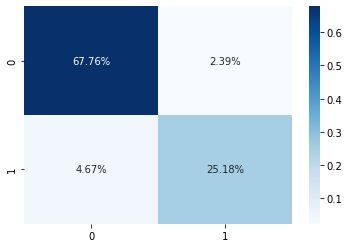

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('Social_Network_Ads.csv')
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = np.loadtxt('X_train3.txt', delimiter=",")
y_train = np.loadtxt('y_train3.txt')
X_test = np.loadtxt('X_test3.txt', delimiter=",")
y_test = np.loadtxt('y_test3.txt')

#xmin = np.array([0,0,0,0,0,0,0,-48,0,-15.0234742,0,0,0,0,0,0,-3276.8,0,0,0])
#xmax = np.array([3,99.6094,16383.75,99.6094,99.6094,254,3,143.25,3,104.6948357,99.603,25.8984375,99.609375,99.609375,99.609375,99.609375,3276.8,1016,15,15])
X_test = (X_test - X_train.min(0)) / X_train.ptp(0)
X_train = (X_train - X_train.min(0)) / X_train.ptp(0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Classification to the Training set
from sklearn.svm import SVC
class_weights = {0: 1,1: 5}
classifier = SVC(C = 2, kernel = 'rbf', class_weight=class_weights)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cf_matrix= confusion_matrix(y_test, y_pred)
categories = ['Normal','Attack']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%',cmap='Blues')
labels = ['True Neg','False Pos','False Neg','True Pos']
print("tn, fp, fn, tp: ", tn, fp, fn, tp)


In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import keras.utils
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
from keras import utils as np_utils
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
import pandas as pd
import csv
%matplotlib inline  
from ast import literal_eval 
import array as array

In [ ]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()





Normalized confusion matrix
[[0.97 0.03]
 [0.16 0.84]]


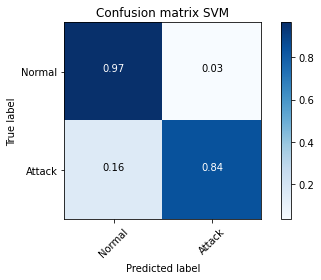

In [ ]:

# Compute confusion matrix
cf_matrix= confusion_matrix(y_test, y_pred)

# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cf_matrix, classes=['Normal','Attack'],
                      title='Confusion matrix SVM')

Normalized confusion matrix
[[0.97 0.03]
 [0.57 0.43]]


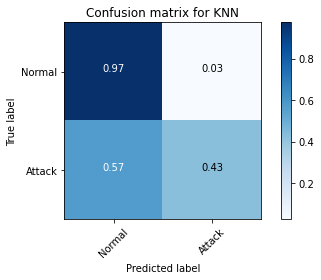

In [ ]:
# Compute confusion matrix
cf_matrix_kn = confusion_matrix(y_test, y_pred_kn)

# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cf_matrix_kn, classes=['Normal','Attack'],
                      title='Confusion matrix for KNN')

Normalized confusion matrix
[[0.7  0.3 ]
 [0.49 0.51]]


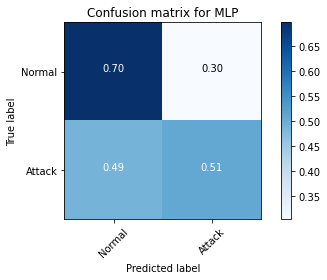

In [ ]:
# Compute confusion matrix
cf_matrix_MLP = confusion_matrix(y_test, y_pred_MLP)

# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cf_matrix_MLP, classes=['Normal','Attack'],
                      title='Confusion matrix for MLP')

KNN: 0.726555 (0.061821)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


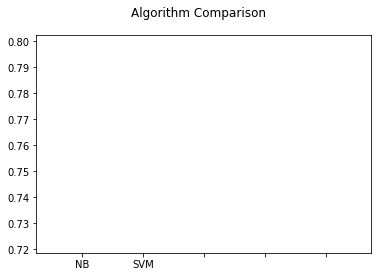

In [ ]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=None)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
# print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.plot(cv_results.mean())
ax.set_xticklabels(names)
plt.show()